In [2]:
import pandas as pd
df = pd.read_csv("laptop_data.csv")
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

# Предобработка данных


## Проверка на дубликаты:

In [3]:
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  1


In [4]:
df = df.drop_duplicates()
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  0


## Проверка на None или NaN значения:

In [5]:
print(df.isnull().sum())

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


## String to int

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ["Company", "TypeName", "Ram", "Cpu_brand", "Gpu_brand", "Os"]:
    df[i] = label.fit_transform(df[i])
display(df)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,500,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,128,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,512,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


## Разделение признаков

In [7]:
categorical = ["Company", "TypeName", "Ram", "TouchScreen", "Ips", "Cpu_brand", "HDD", "SSD", "Gpu_brand", "Os"]
cont = []
for i in df.columns:
    if i not in categorical:
        cont.append(i)
cont

['Weight', 'Price', 'Ppi']

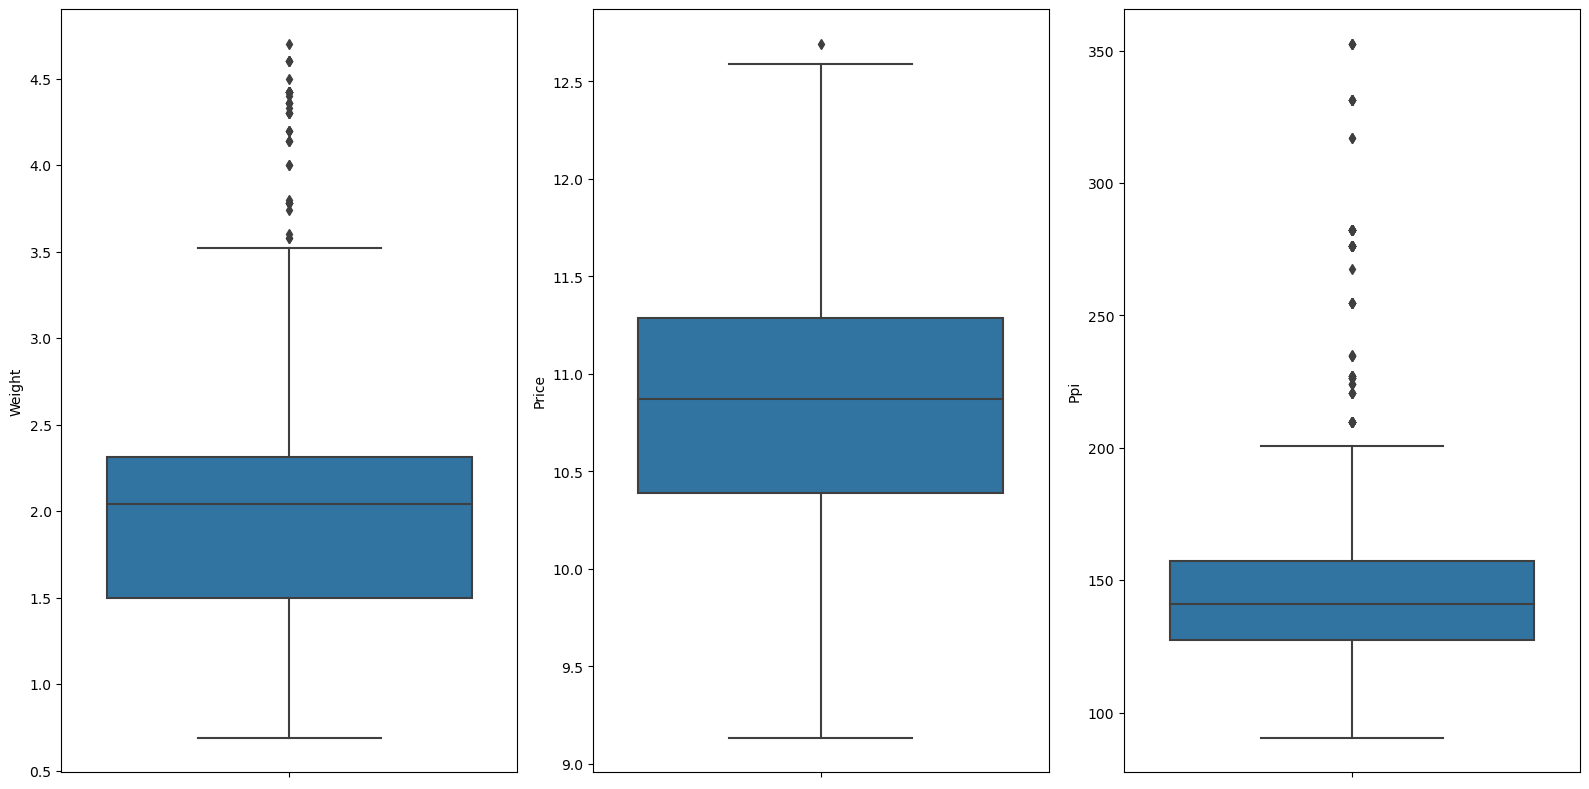

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

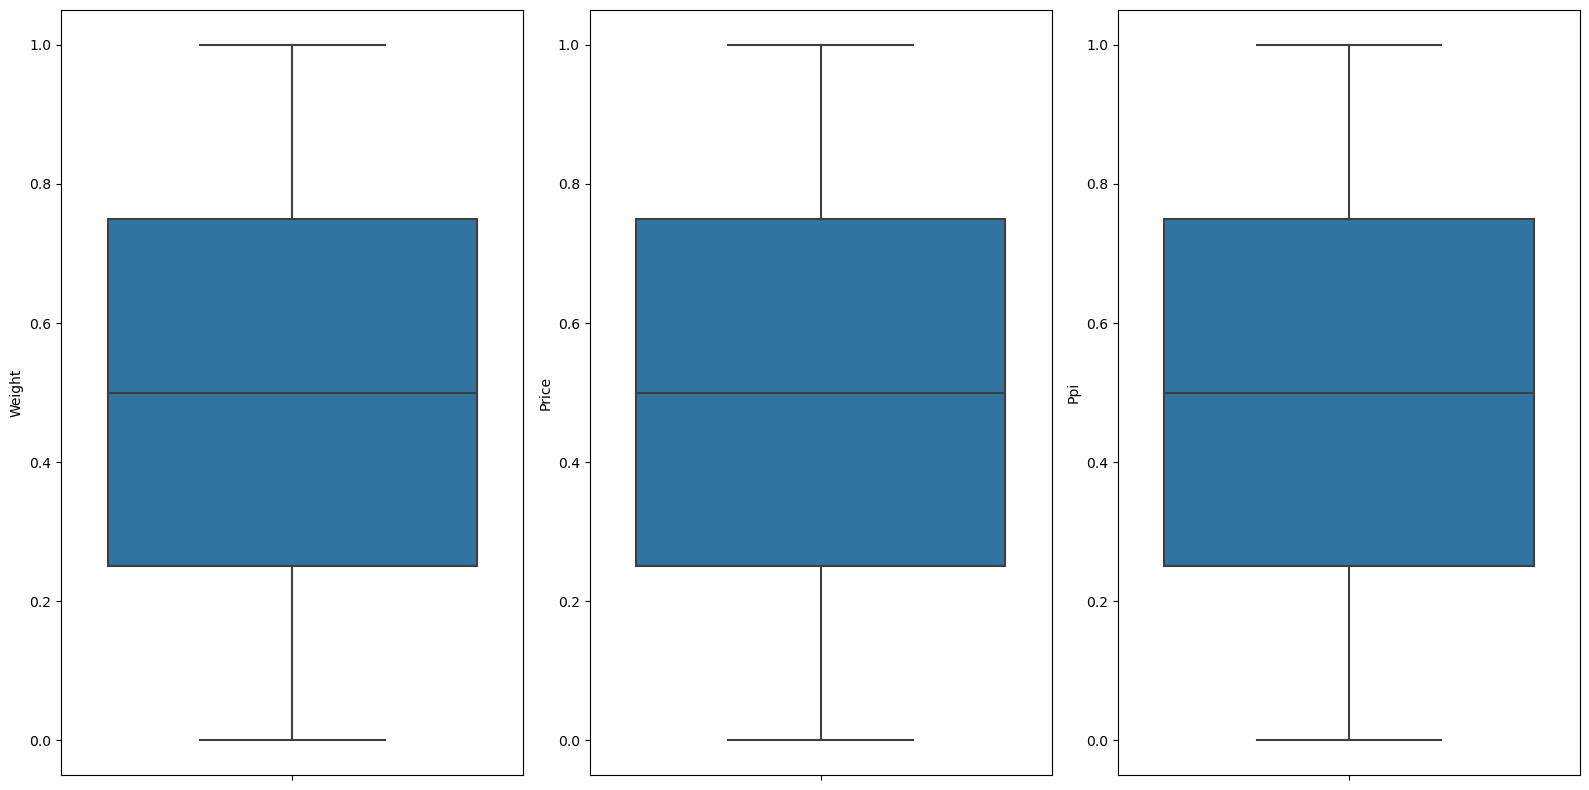

In [9]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, random_state=1)
df[cont] = qt.fit_transform(df[cont])

fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

## Матрица корреляций

<Axes: >

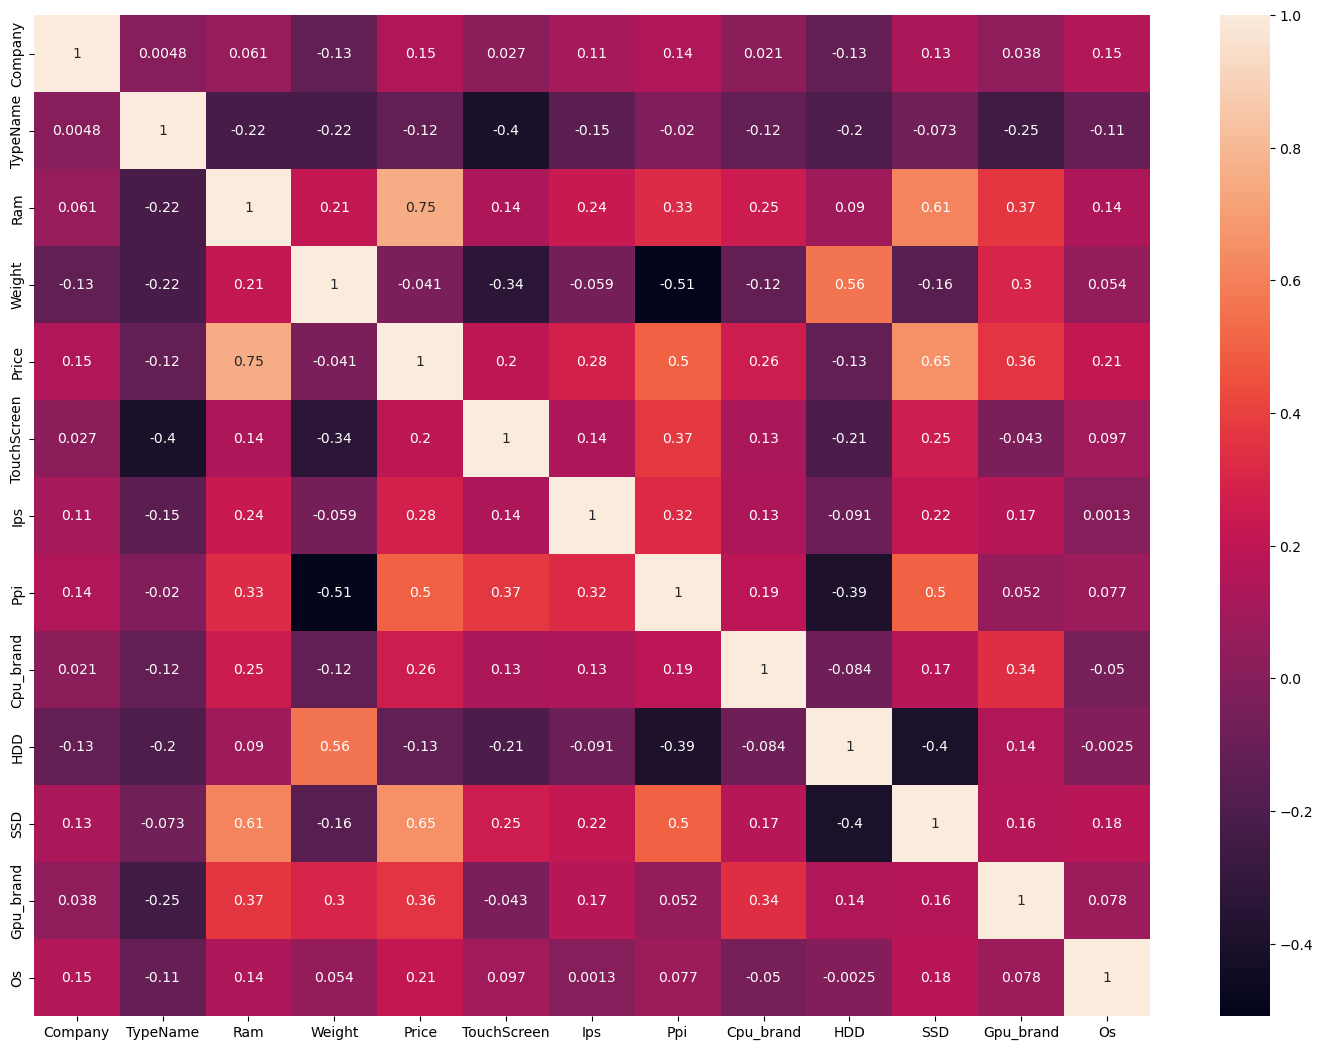

In [10]:
plt.figure(figsize = (18,13))
sns.heatmap(df.corr(), annot=True)

## Тренировочная и тестовая выборки

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(1017, 12)
(255, 12)


# Обучение моделей

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def performance(y_test, y_pred):
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2:', r2_score(y_test, y_pred))

## Линейная регрессия

In [16]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)
performance(y_test, y_pred)

MAE: 3.7886657462460955e-16
MSE: 2.804051706355174e-31
RMSE: 5.295329740776465e-16
R^2: 1.0
